# Predicting House Prices with the King County Housing Data Set

## Final Project Submission

* Student name: Avonlea Fisher 
* Student pace: full time 
* Scheduled project review date/time: Thursday, Sep 10, 2020, 04:30 PM - 05:15 PM EST
* Instructor name: James Irving
* Blog post URL: https://medium.com/@avfisher/predicting-king-county-house-prices-with-multiple-linear-regression-84de5feeafb2


## Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a multiple regression model than can predict a house's price as accurately as possible.

### Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Analysis Questions

This analysis will seek to answer three questions about the data:

* <b>Question 1: </b> Which features are most highly correlated with price?

* <b>Question 2: </b> Which features have the strongest correlations with other predictor variables? 

* <b>Question 3: </b> What combinations of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

## Previewing the Data

In [1]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's start by loading and previewing the dataframe.

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now let's check the datatypes and shape.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We can see that it’s a large dataset, containing more than 21 thousand entries and 20 columns. Almost all of the columns contain numeric data, which is convenient for linear regression.

Let's look at the distribution of variables in the dataset:

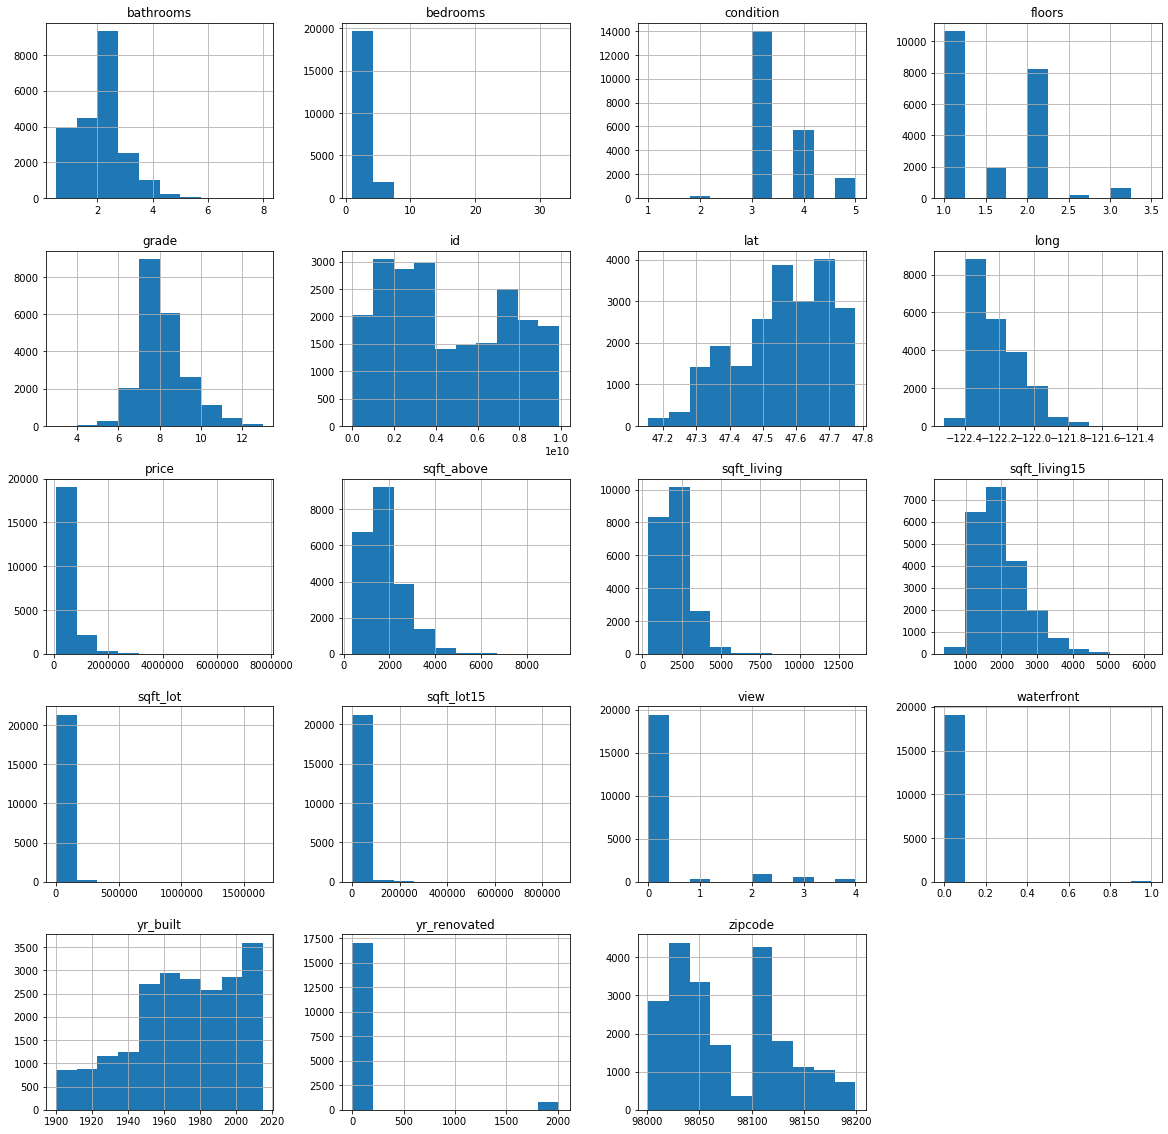

In [4]:
df.hist(figsize=(20,20));

Many of the variables do not follow a normal distribution, and the scales are dramatically different for some variables. This may create issues with satisfying all regression assumptions, but we'll address those issues as they arise. Regression does not require features to be normally distributed.

## Preprocessing 

### Dealing with Missing Values

Let's look at the proportions of missing values in each of the columns.

In [5]:
for column in df.columns:
    proportion_of_nas = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, proportion_of_nas)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
view 0.29170718155299347
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 17.78950780200954
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


The waterfront, view, and yr_renovated variables all have missing values. Let's inspect the value counts for each of these columns.

In [6]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [7]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [8]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

Given that the majority of homes in the data do not have a renovation date (indicated by '0'), and that nearly 18% of the rows contain missing values, we can drop this columns entirely without losing too much useful data. The view column contains only 63 missing values, which can be filled with the median to avoid losing additional data.

In [9]:
df.drop('yr_renovated', axis=1, inplace=True)

In [10]:
df['waterfront'].fillna(0, inplace=True)

In [11]:
df['view'].fillna(np.mean(df['view']), inplace=True)

Let's check the missing value counts again to confirm that none remain in the data.

In [12]:
for column in list(df.columns):
    print(column, sum(df[column].isnull()))

id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0


### Dealing with Outliers

Outliers should be kept if they have the potential to reveal useful information about relationships in our data. There are two variables in this dataset, however, whose outliers should be removed: bedrooms and bathrooms. If a residence in the dataset has, for example, more than 5 bathrooms or more than 10 bedrooms, we're likely not dealing with single-family homes, but much larger units that would be better to analyze separately. For this reason, we'll remove all rows in the data that contain outlier values for these columns.

In [13]:
count = 0
bath_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

187

In [14]:
count = 0
bed_outliers = []
mean = np.mean(df['bedrooms'])
max_distance = np.std(df['bedrooms']) * 3 

for idx, row in df['bedrooms'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx,inplace=True)
count

47

There were 47 remaining bedroom outliers after we dropped the 187 bathroom outliers. Getting rid of these outliers likely also excluded rows with extreme values for other variables.

### One-Hot Encoding 

There's one variable in the dataset that we would expect to be highly related with price, but which doesn't have a clear linear relationship: condition. The values for this column are coded on a 1-5 linear scale, with 1 being 'poor' and 5 being 'very good.' Interestingly, the below scatterplot shows that 'average' houses tend to perform the best in terms of price.

Text(0.5, 1.0, 'House Condition and Price')

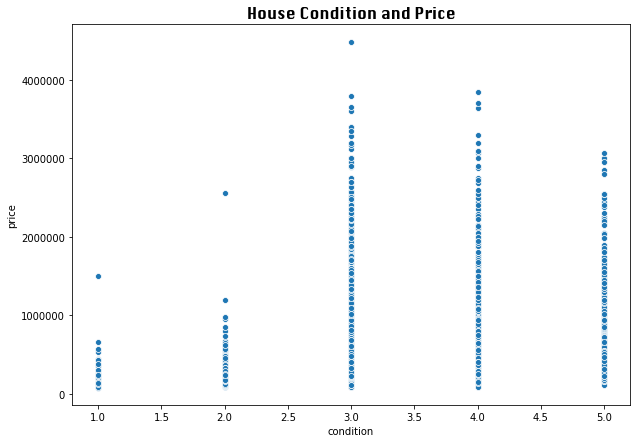

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['condition'], df['price'])
plt.title('House Condition and Price', fontsize=15, fontname='silom')

This may be due to the fact that the condition values are relative to age and grade (which refers to the design/quality of construction rather than the utility/functionality of the building). A new, excellently designed, very expensive building could be given an 'average' condition rating if some functional repairs are needed. As we can see in the scatterplot below, average condition houses also tend to have the highest grade rating.

Text(0.5, 1.0, 'House Condition and Grade')

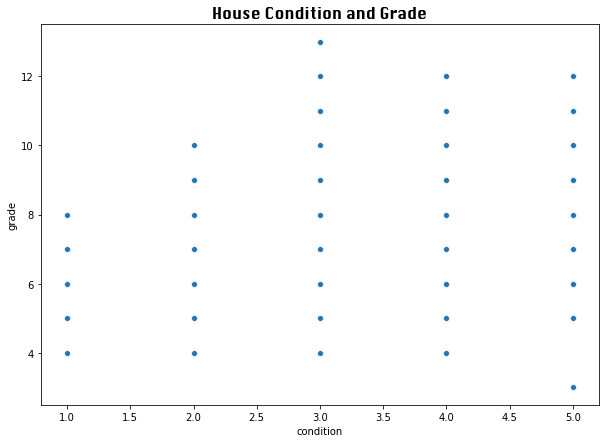

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(df['condition'], df['grade'])
plt.title('House Condition and Grade', fontsize=15, fontname='silom')

There might be a clearer linear relationship between price and specific condition values, which we can explore more effectively by one-hot encoding the variable. The below code creates a dummy variable for each condition value, drops the first value to avoid the dummy variable trap, drops the original column, and joins the new variables to the dataframe.

In [17]:
one_hot = pd.get_dummies(df['condition'], drop_first=True) #drop a column to avoid dummy variable trap
df = df.drop('condition',axis = 1)
df = df.join(one_hot)

Now if we generate scatter plots the condition values, we can see a clearer linear relationship.

<Figure size 432x288 with 0 Axes>

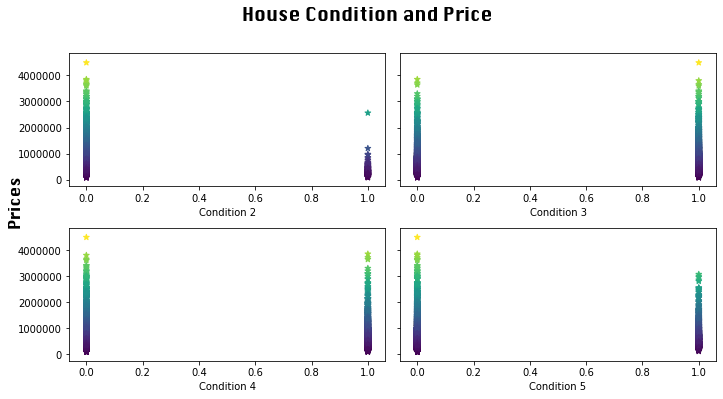

In [18]:
price = df['price']
two = df['two'] = df[2] 
three = df['three'] = df[3] 
four = df['four'] = df[4] 
five = df['five'] = df[5] 

f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = True, figsize=(10,5))

f.suptitle('House Condition and Price', fontsize=18, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(two, price, c = price, marker = "*")
axes[0][0].set_xlabel('Condition 2')

axes[0][1].scatter(three, price, c = price, marker = "*")
axes[0][1].set_xlabel('Condition 3')

axes[1][0].scatter(four, price, c = price, marker = "*")
axes[1][0].set_xlabel('Condition 4')

axes[1][1].scatter(five, price, c = price, marker = "*")
axes[1][1].set_xlabel('Condition 5')


f.tight_layout()
plt.show()

There are linear relationships for each column, with condition ratings 2 and three having the most pronounced relationships.

### Checking Correlations and Multicollinearity

We're interested in finding out which variables are most strongly correlated with price, as these variables will be good candidates for inclusion in our model. One of the assumptions of a multiple linear regression model, however, is that there is no multicollinearity among the explanatory variables (i.e., they can't be predicted by other explanatory variables with high accuracy). Below, we create a correlation matrix of price and continuous variables in the dataset to visualize correlations.

In [19]:
#create a list of meaningfully continuous x variables
x_columns = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 2, 3, 4, 5]

#update dataframe to only include the above variables
df_clean = df[x_columns]
df_clean['price'] = df['price']
df = df_clean

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


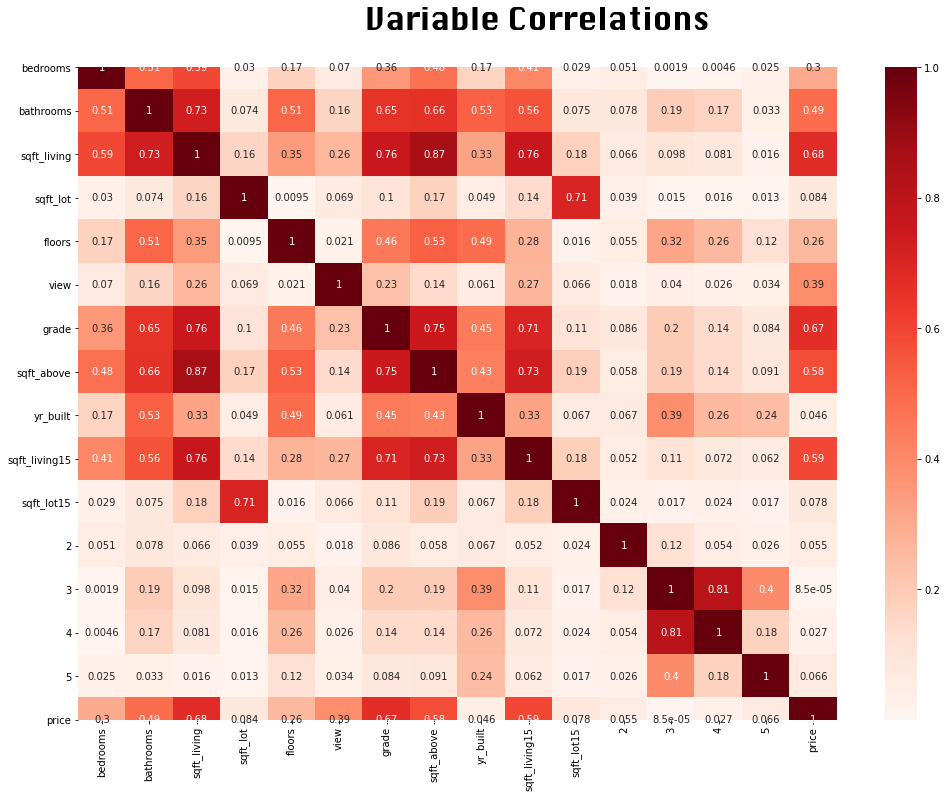

In [20]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

As we might expect, many of the variables related to the size of homes (e.g. sqft, number of rooms) are highly correlated with each other. Generally, we don’t want to include any two x variables whose correlation exceeds .80 in the same model. We do, however, want to include variables that are correlated with the y variable. The code below creates and displays two small dataframes that narrow down the correlations we’re most interested in.

In [21]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [22]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [23]:
print('Correlations with Price')
display(corr_price_df)
print('Multicollinear Features')
display(MC_df)

Correlations with Price


,Correlations,Features
2,0.677596,sqft_living
4,0.668335,grade
6,0.593674,sqft_living15
5,0.578363,sqft_above
1,0.489138,bathrooms
3,0.386794,view
0,0.302105,bedrooms


Multicollinear Features


,Correlations,Features
0,0.866887,"[sqft_living, sqft_above]"
1,0.866887,"[sqft_above, sqft_living]"
2,0.812117,"[3, 4]"
3,0.812117,"[4, 3]"


## Question 1: Which features are most highly correlated with price?
Generally, any correlation above .7 is considered high. While there are no correlations with price above .7 in the dataset, there are several features with moderately strong correlations. Sqft_living, grade, sqft_living15, sqft_above and bathrooms have the highest correlations with price. 


##  Question 2: Which features have the strongest correlations with other predictor variables? 
Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

Below, we create objects for the variables that are strong candidates for inclusion in the model. 

In [24]:
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

We'll now make some scatterplots to visually explore the relationship between these variables and price. Linear regression analysis also assumes that the relationship between explanatory and response variables is linear.

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


<Figure size 432x288 with 0 Axes>

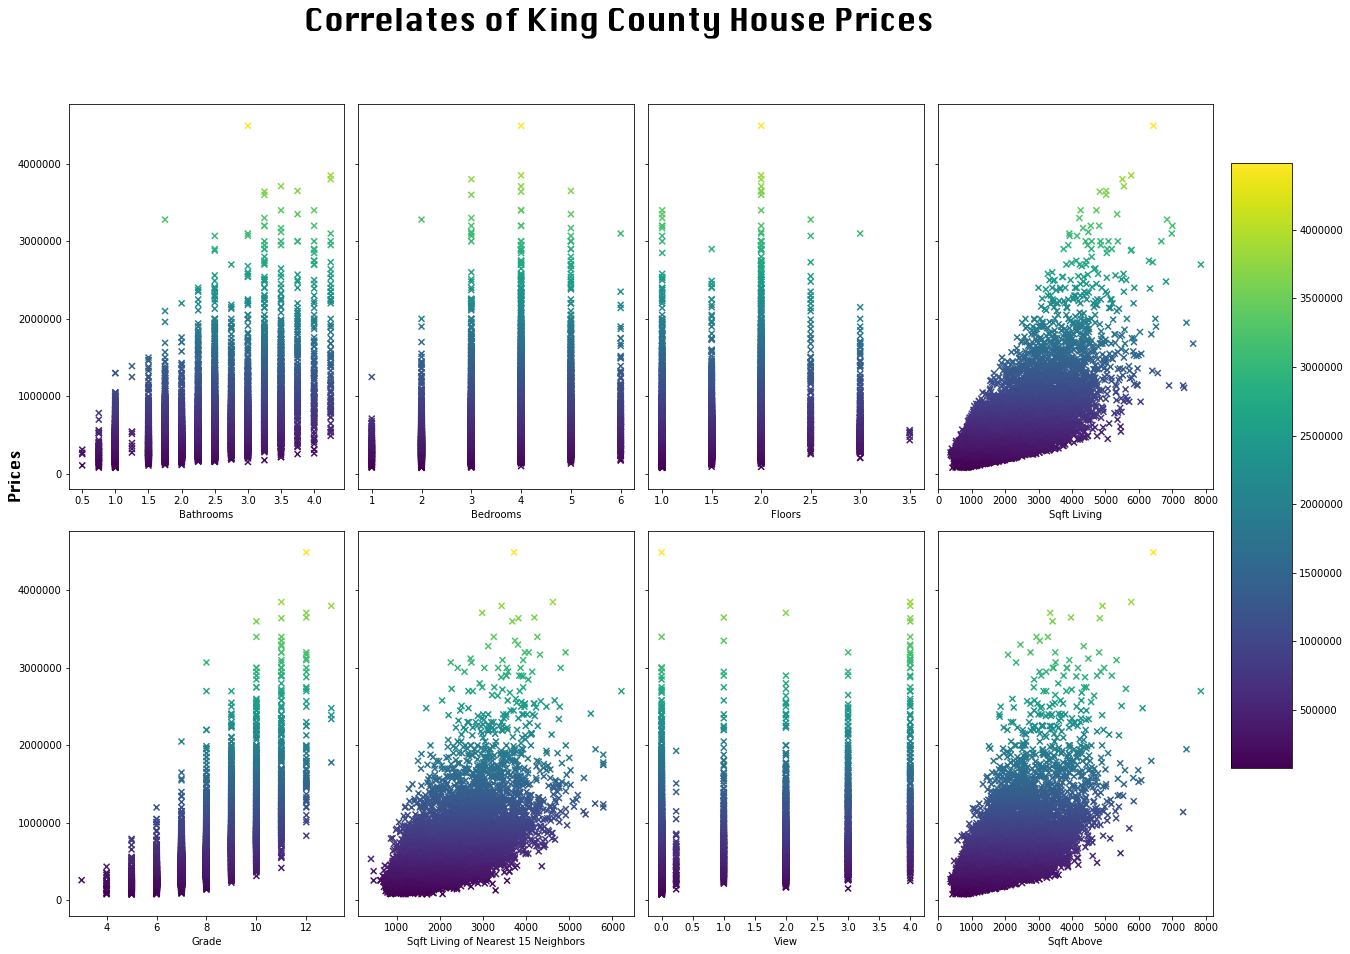

In [25]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()


The 'view', 'floors', and 'bedrooms' variables do not have a clear linear relationship with house price. Sqft living has a stronger linear relationship with price than sqft above, so it will be used in the multiple regression model. Due to its multicollinearity with sqft above, sqft above will be excluded.

# Simple Linear Regression

While the ultimate goal of this project is to develop a multiple regression model for predicting price, we'll select final features by starting with feature-wise simple linear regression. 

There are 3 assumptions about the data that must be checked before building any simple linear regression model:
- There should be a <b>linear relationship</b> between the explanatory and response variables (already checked).
- The data should be <b>homoscedastic</b> (i.e., the residuals have equal variance around the regression line on a scatterplot).
- The model <b>residuals should follow a normal distribution</b> (i.e. the residuals fall along a relatively straight line on a QQ plot).

All of the above assumptions, in addition to the assumption of no multicollinearity, also apply to multiple regression. 

In addition to checking for these assumptions, we will also look at two values in the model summary:
- <b>R-squared:</b> This value tells us what proportion of the variability of y around its mean can be explained by the model. It can fall between 0 and 1, and a higher r-squared value indicates higher predictive power.
- <b>p-value:</b> The null hypothesis for linear regression is that there is no relationship between the chosen explanatory variables and the response variable. Therefore, we want the model to have a p-value lower than .05 so we can reject the null hypothesis.

A simple linear regression model includes only one explanatory variable and one response variable. We'll create a simple linear regression model for each of the chosen explanatory variables that satisfy linearity, and test the assumptions for each. These variables are sqft_living, sqft_living15, bathrooms and grade. 

In [26]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

## 1. Sqft living

<Figure size 432x288 with 0 Axes>

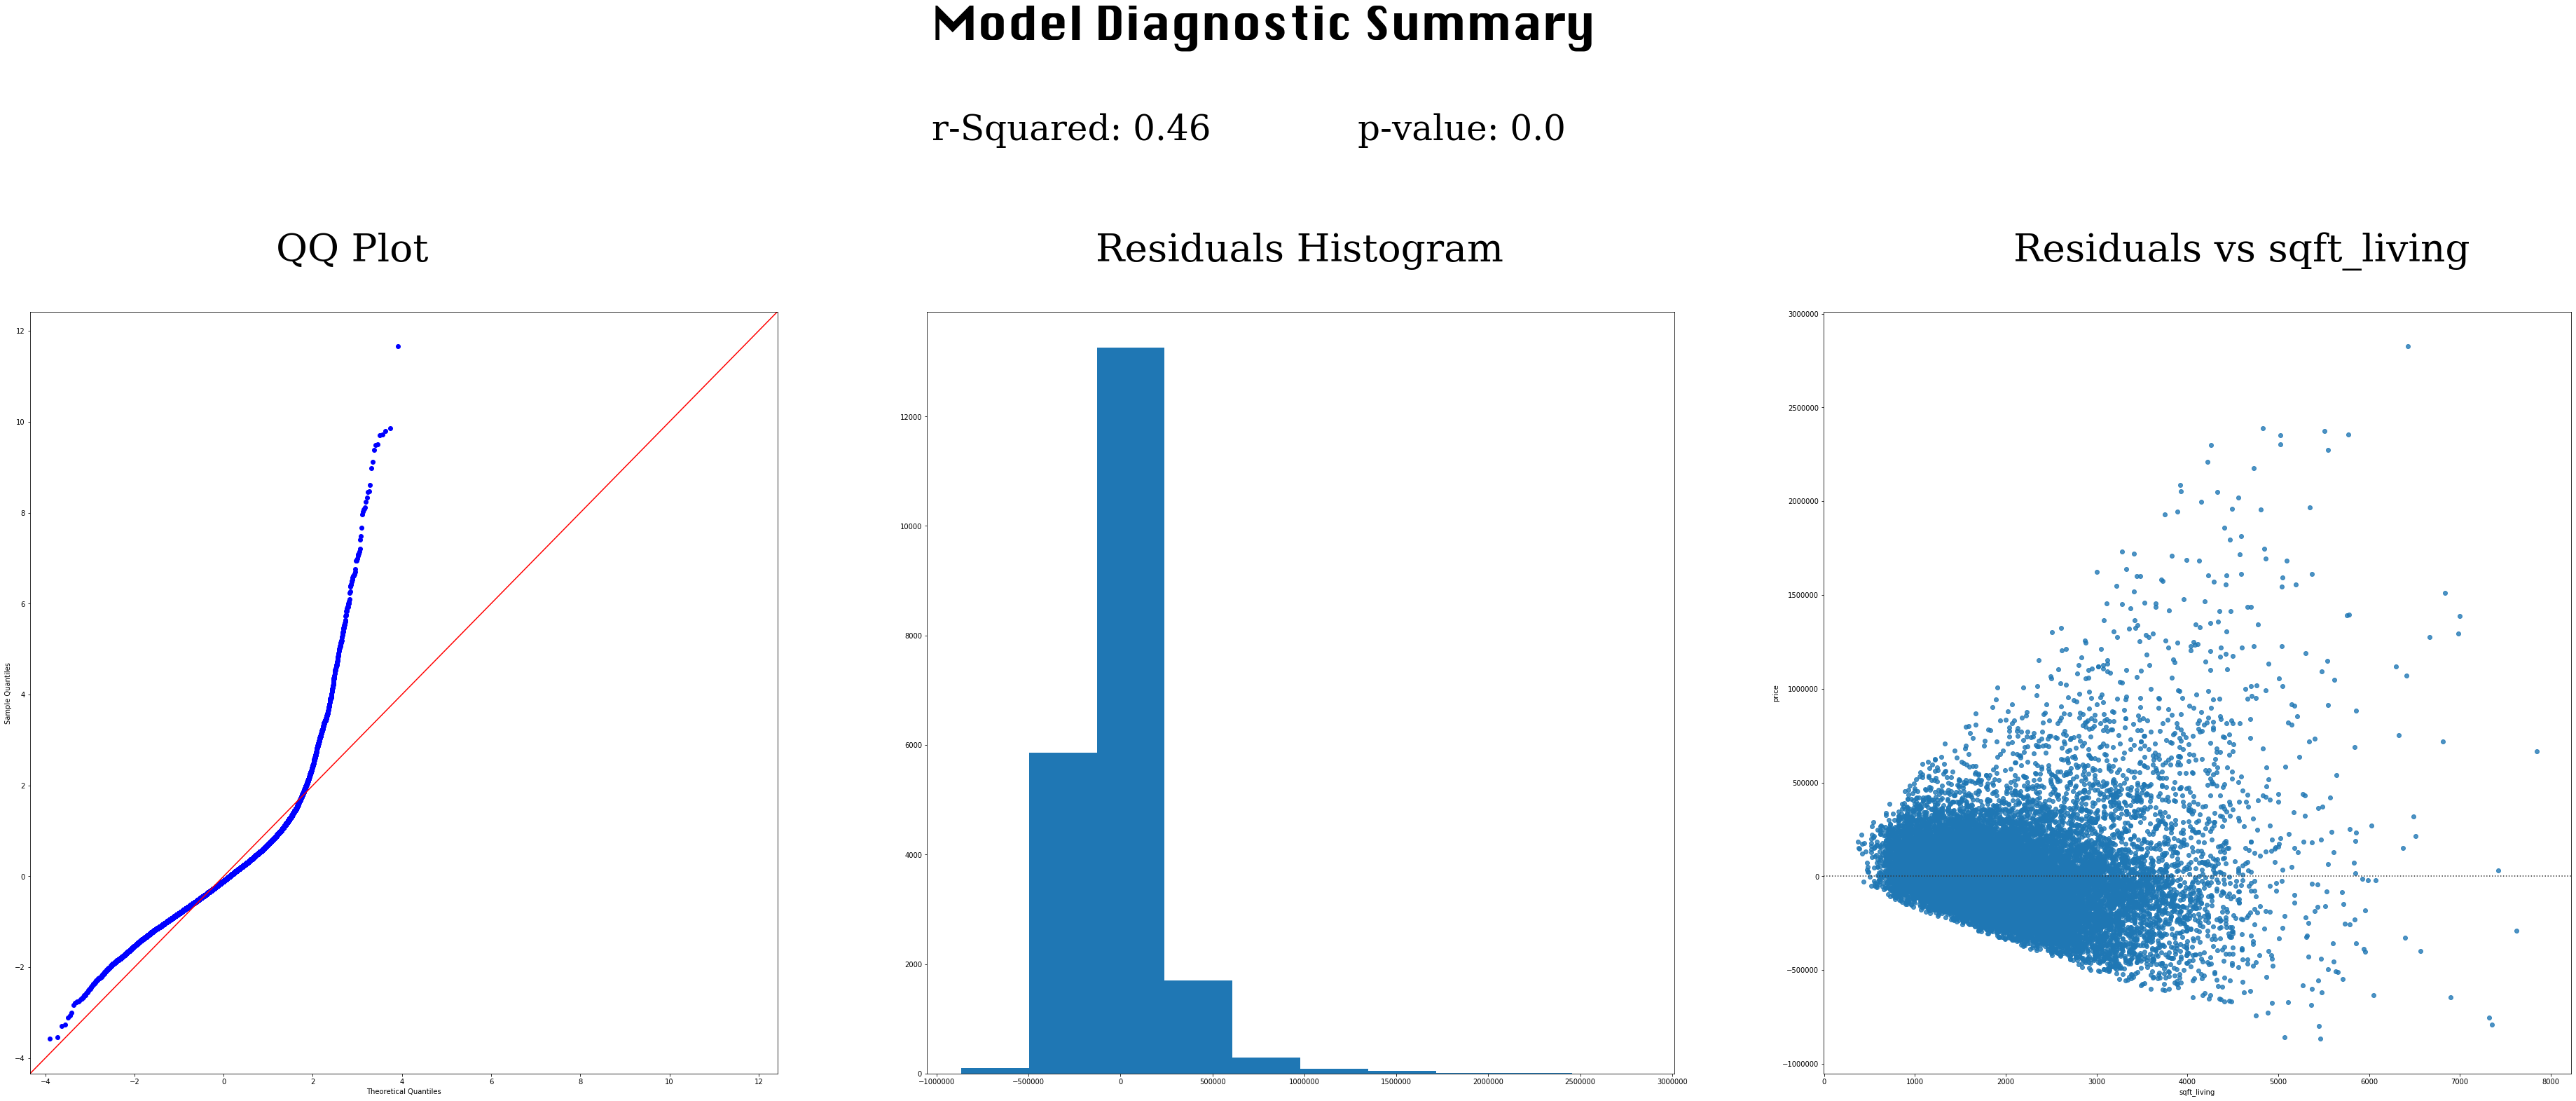

In [27]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft_living_model, sqft_living, 'sqft_living', price)

<b>Homoscedasticity:</b> Heteroscedastic 

<b>Normality of residuals:</b> Not normal.

As we can see, this model violates the homoscedasticity and normality assumptions for linear regression. Log-transformation can often help when these assumptions are not met. Let's update the values to their natural logs and re-check the assumptions.

In [28]:
df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])

<Figure size 432x288 with 0 Axes>

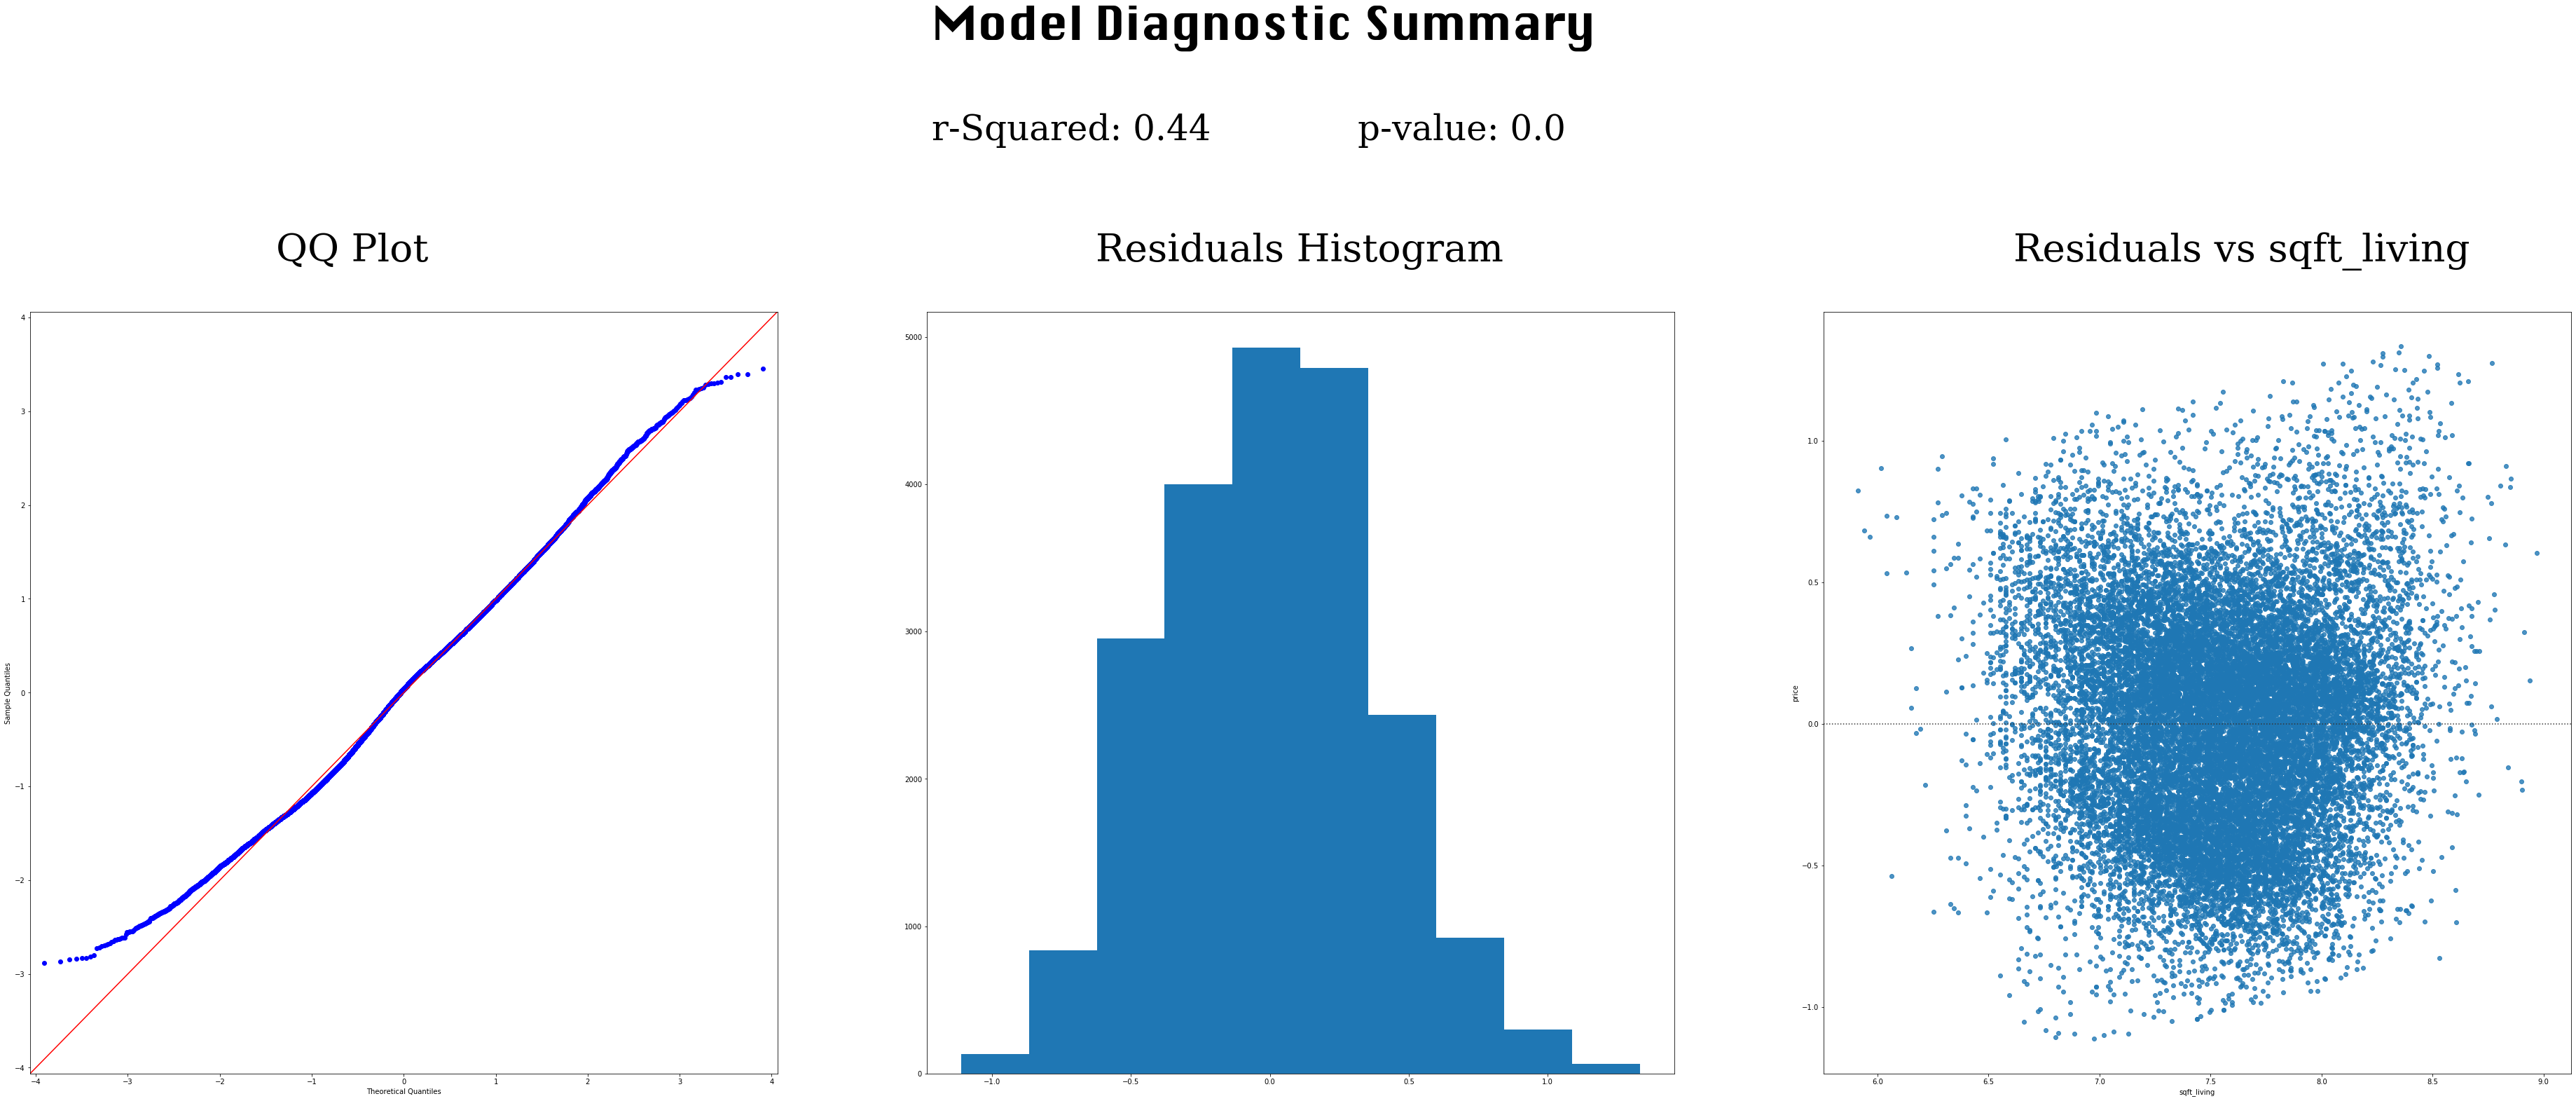

In [29]:
f = 'price~sqft_living'
sqft_living_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft_living_model, df['sqft_living'], 'sqft_living', price)

Much better! Now all assumptions for this model are satisfied.

## 2. Sqft Living of Nearest 15 Neighbors

<Figure size 432x288 with 0 Axes>

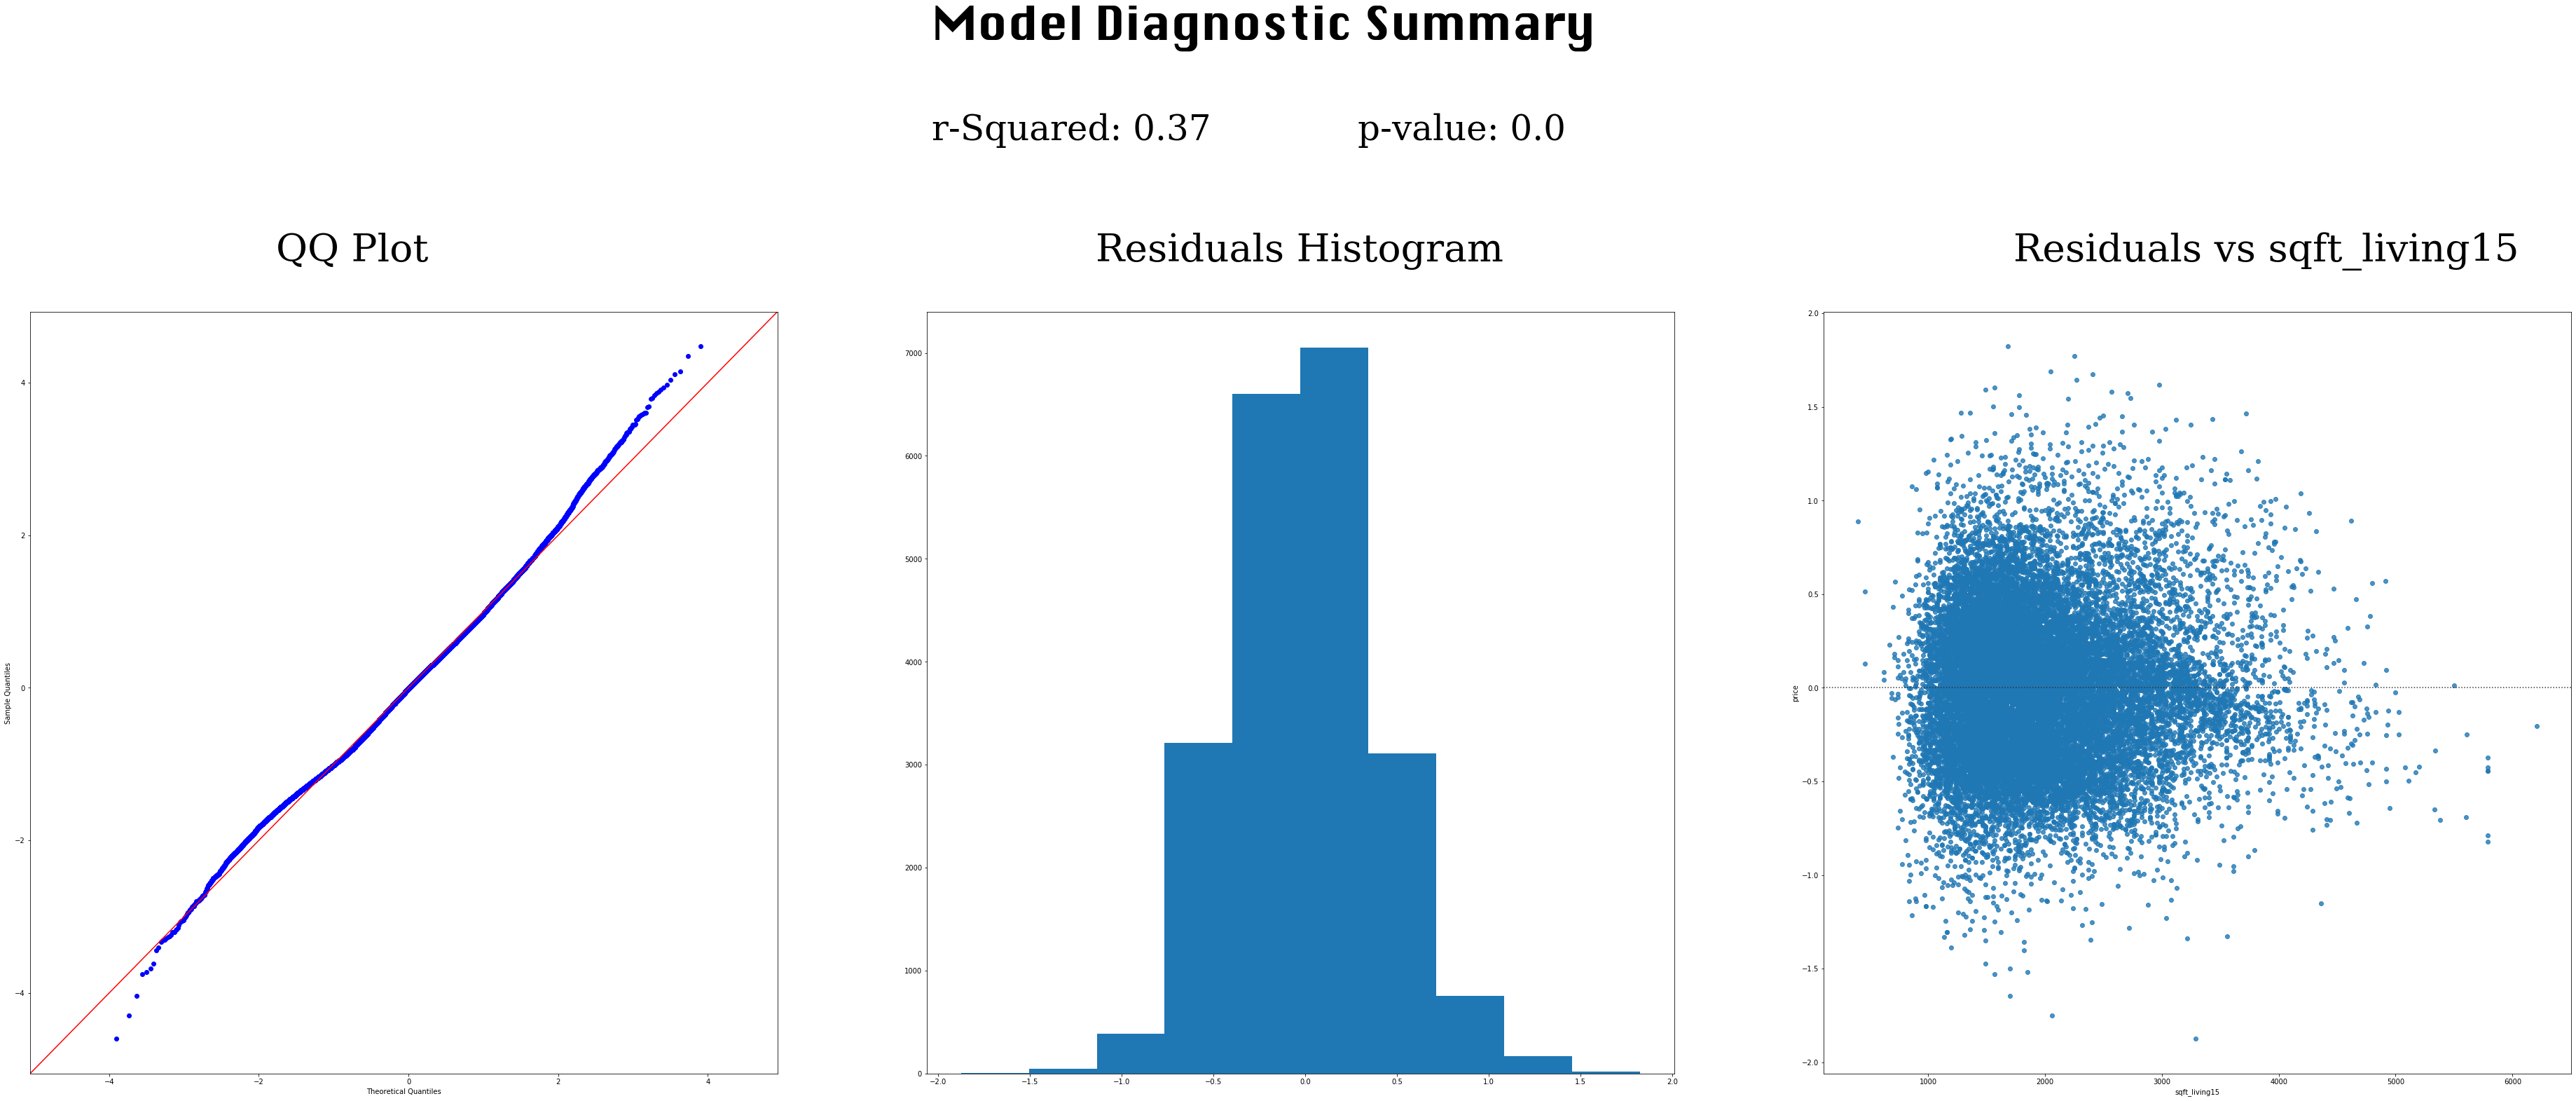

In [30]:
f = 'price~sqft_living15'
sqft15_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft15_model, sqft_living15, 'sqft_living15', price)

<b>Homoscedasticity:</b> Heteroscedastic

<b>Normality of residuals:</b> Mostly normal.

The homoscedasticity assumption is violated. We'll log-transform the sqft_living15 variable, as we did with the previous variable, to address this. 

In [31]:
df['sqft_living15'] = np.log(df['sqft_living15'])

<Figure size 432x288 with 0 Axes>

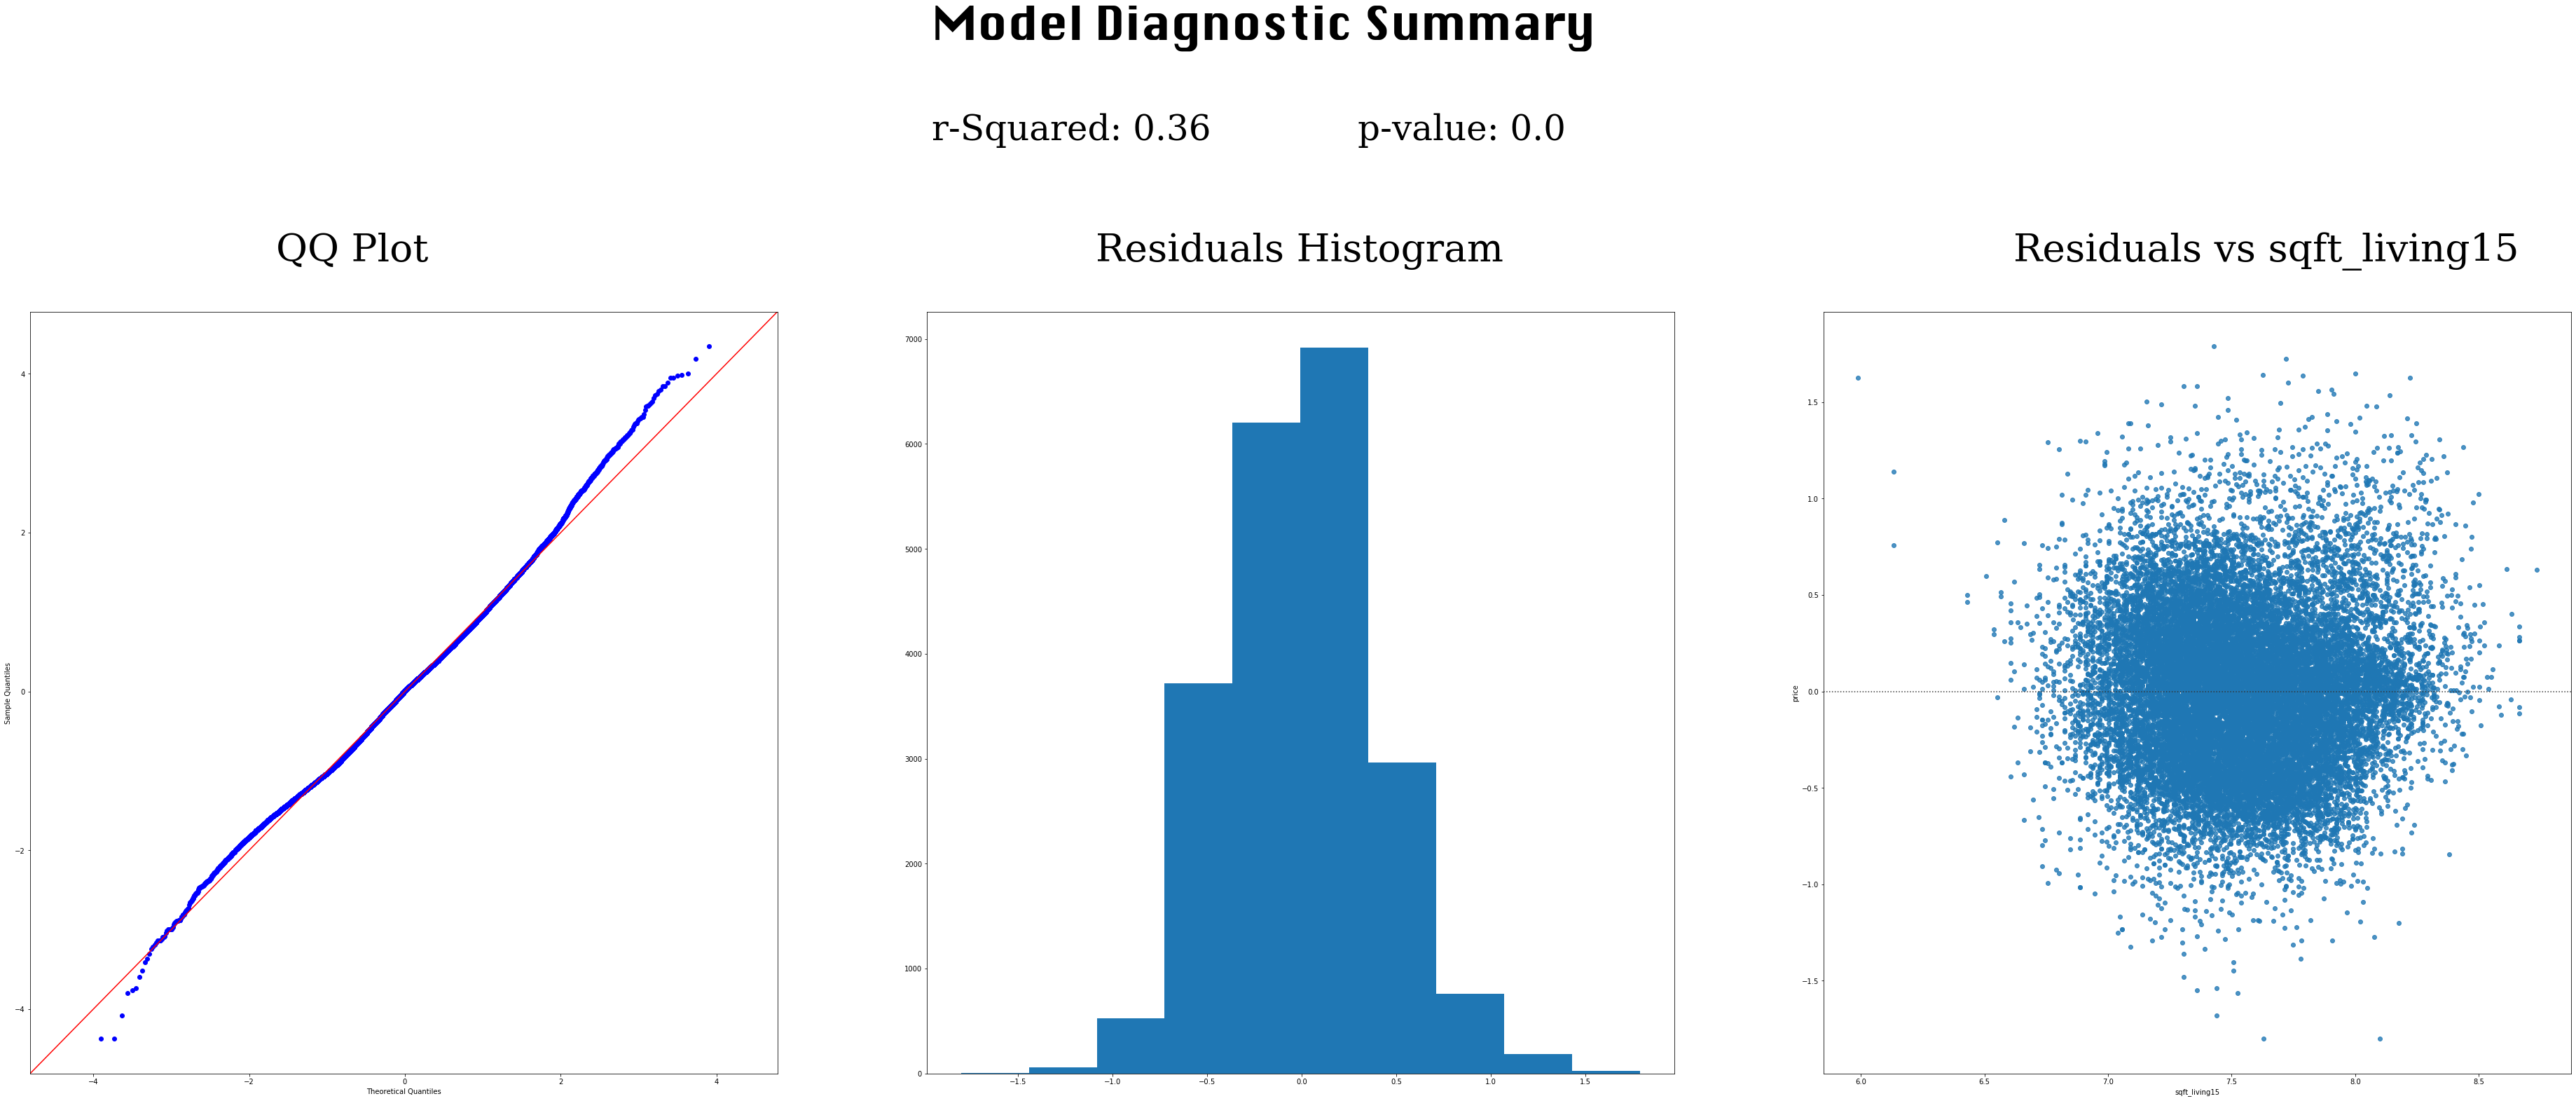

In [32]:
f = "price~sqft_living15"
sqft15_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(sqft15_model, df['sqft_living15'], 'sqft_living15', price)

The residuals scatterplot shows that homoscedasticity assumption is now satisfied.

## 3. Bathrooms

<Figure size 432x288 with 0 Axes>

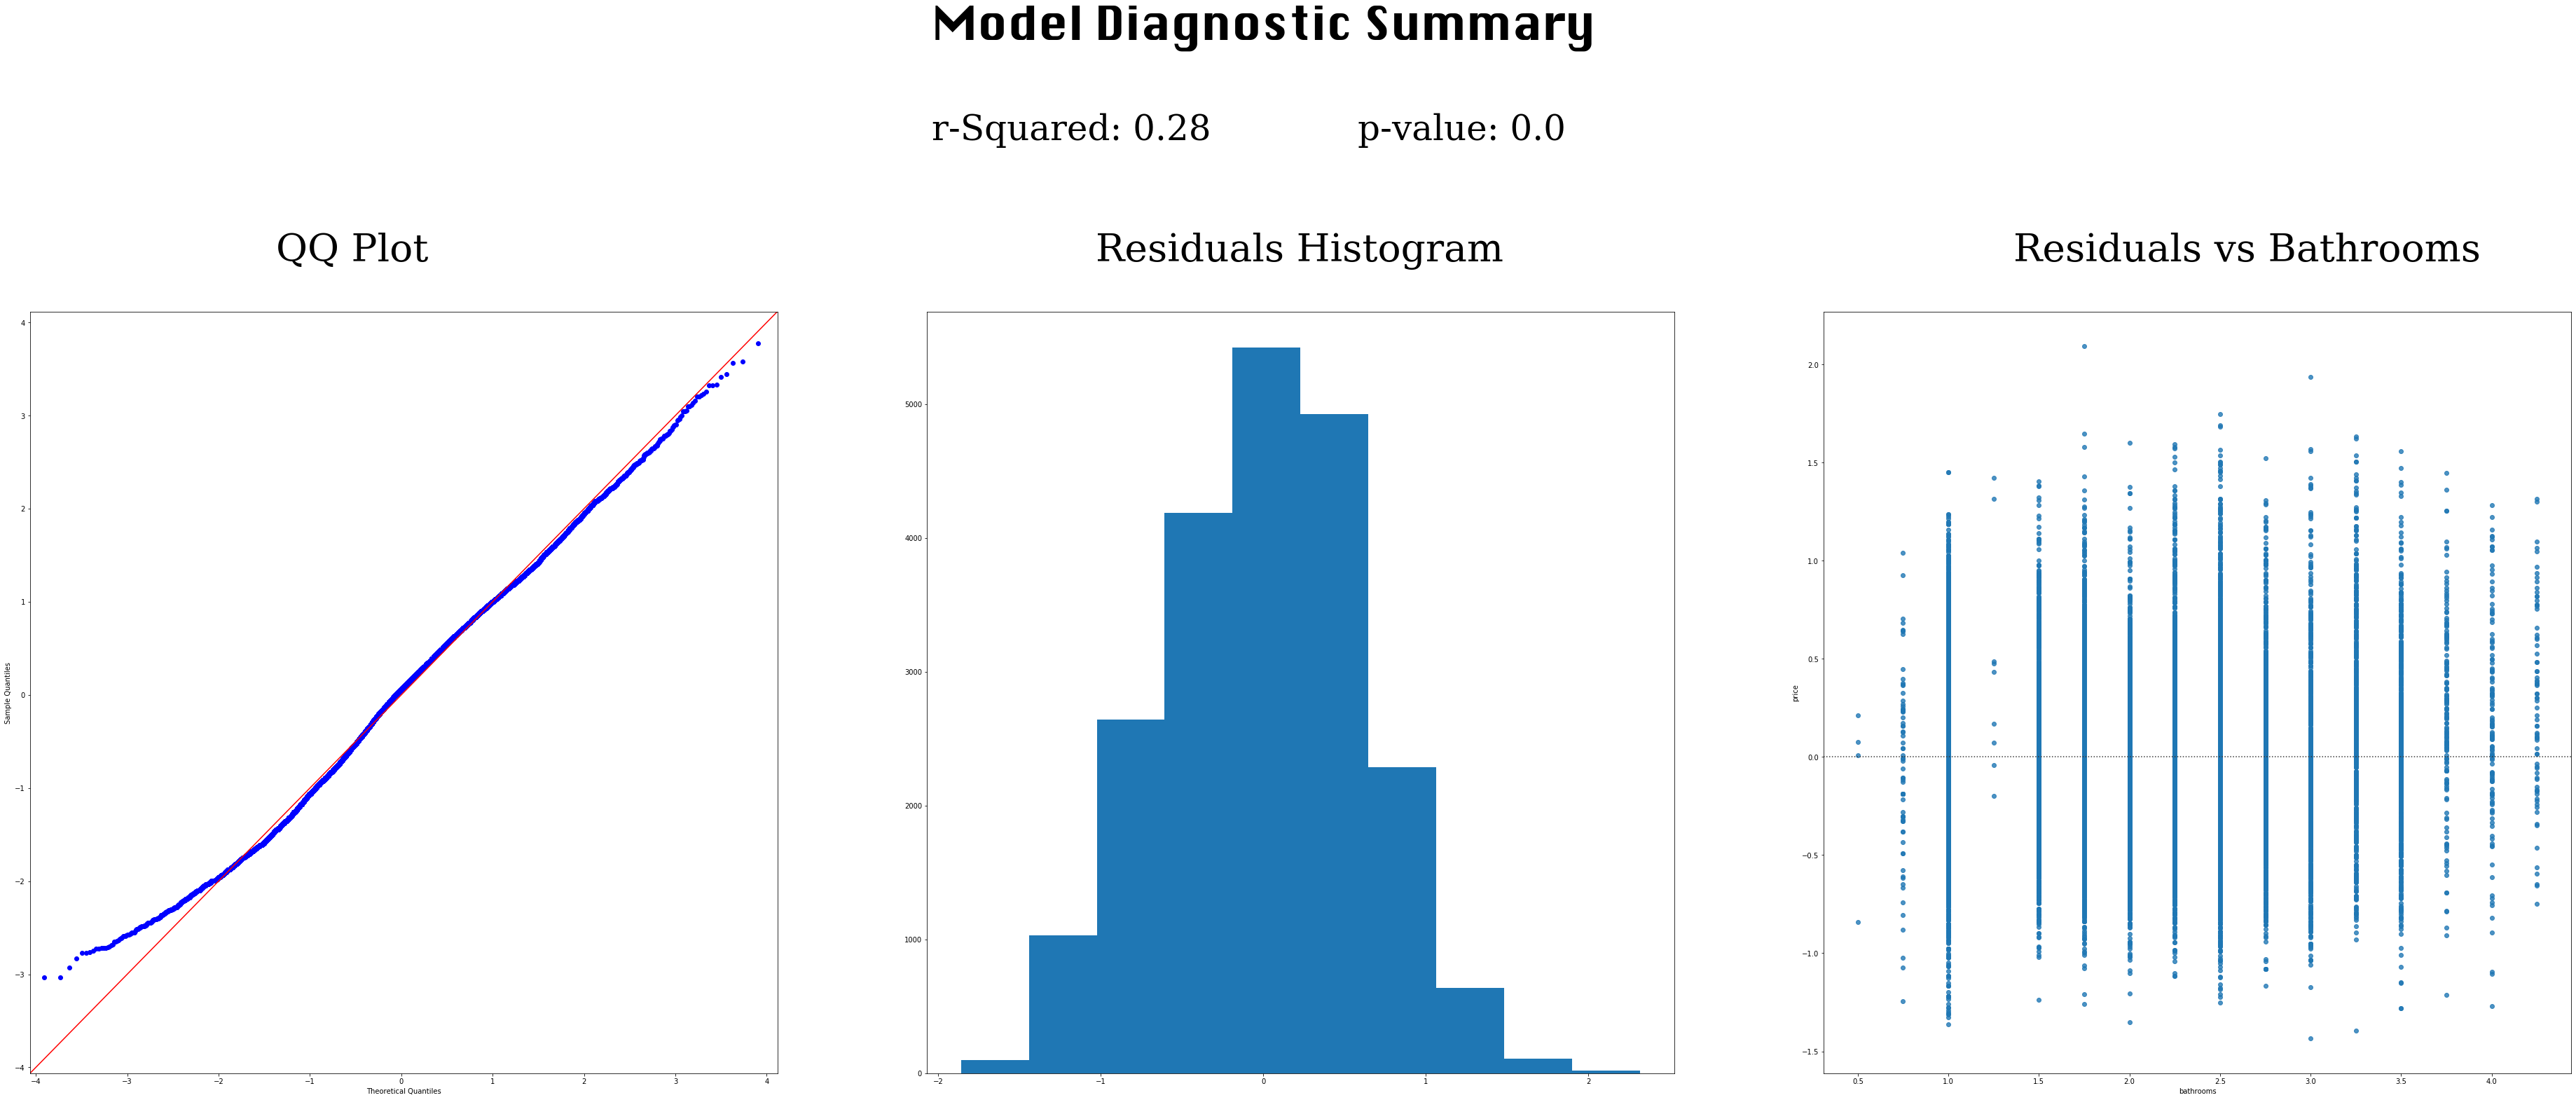

In [33]:
f = "bathrooms~price"
bath_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(bath_model, bath, 'Bathrooms', price)

<b>Homoscedasticity:</b> Mostly homoscedastic

<b>Normality of residuals:</b> Normal

## 4. Grade

<Figure size 432x288 with 0 Axes>

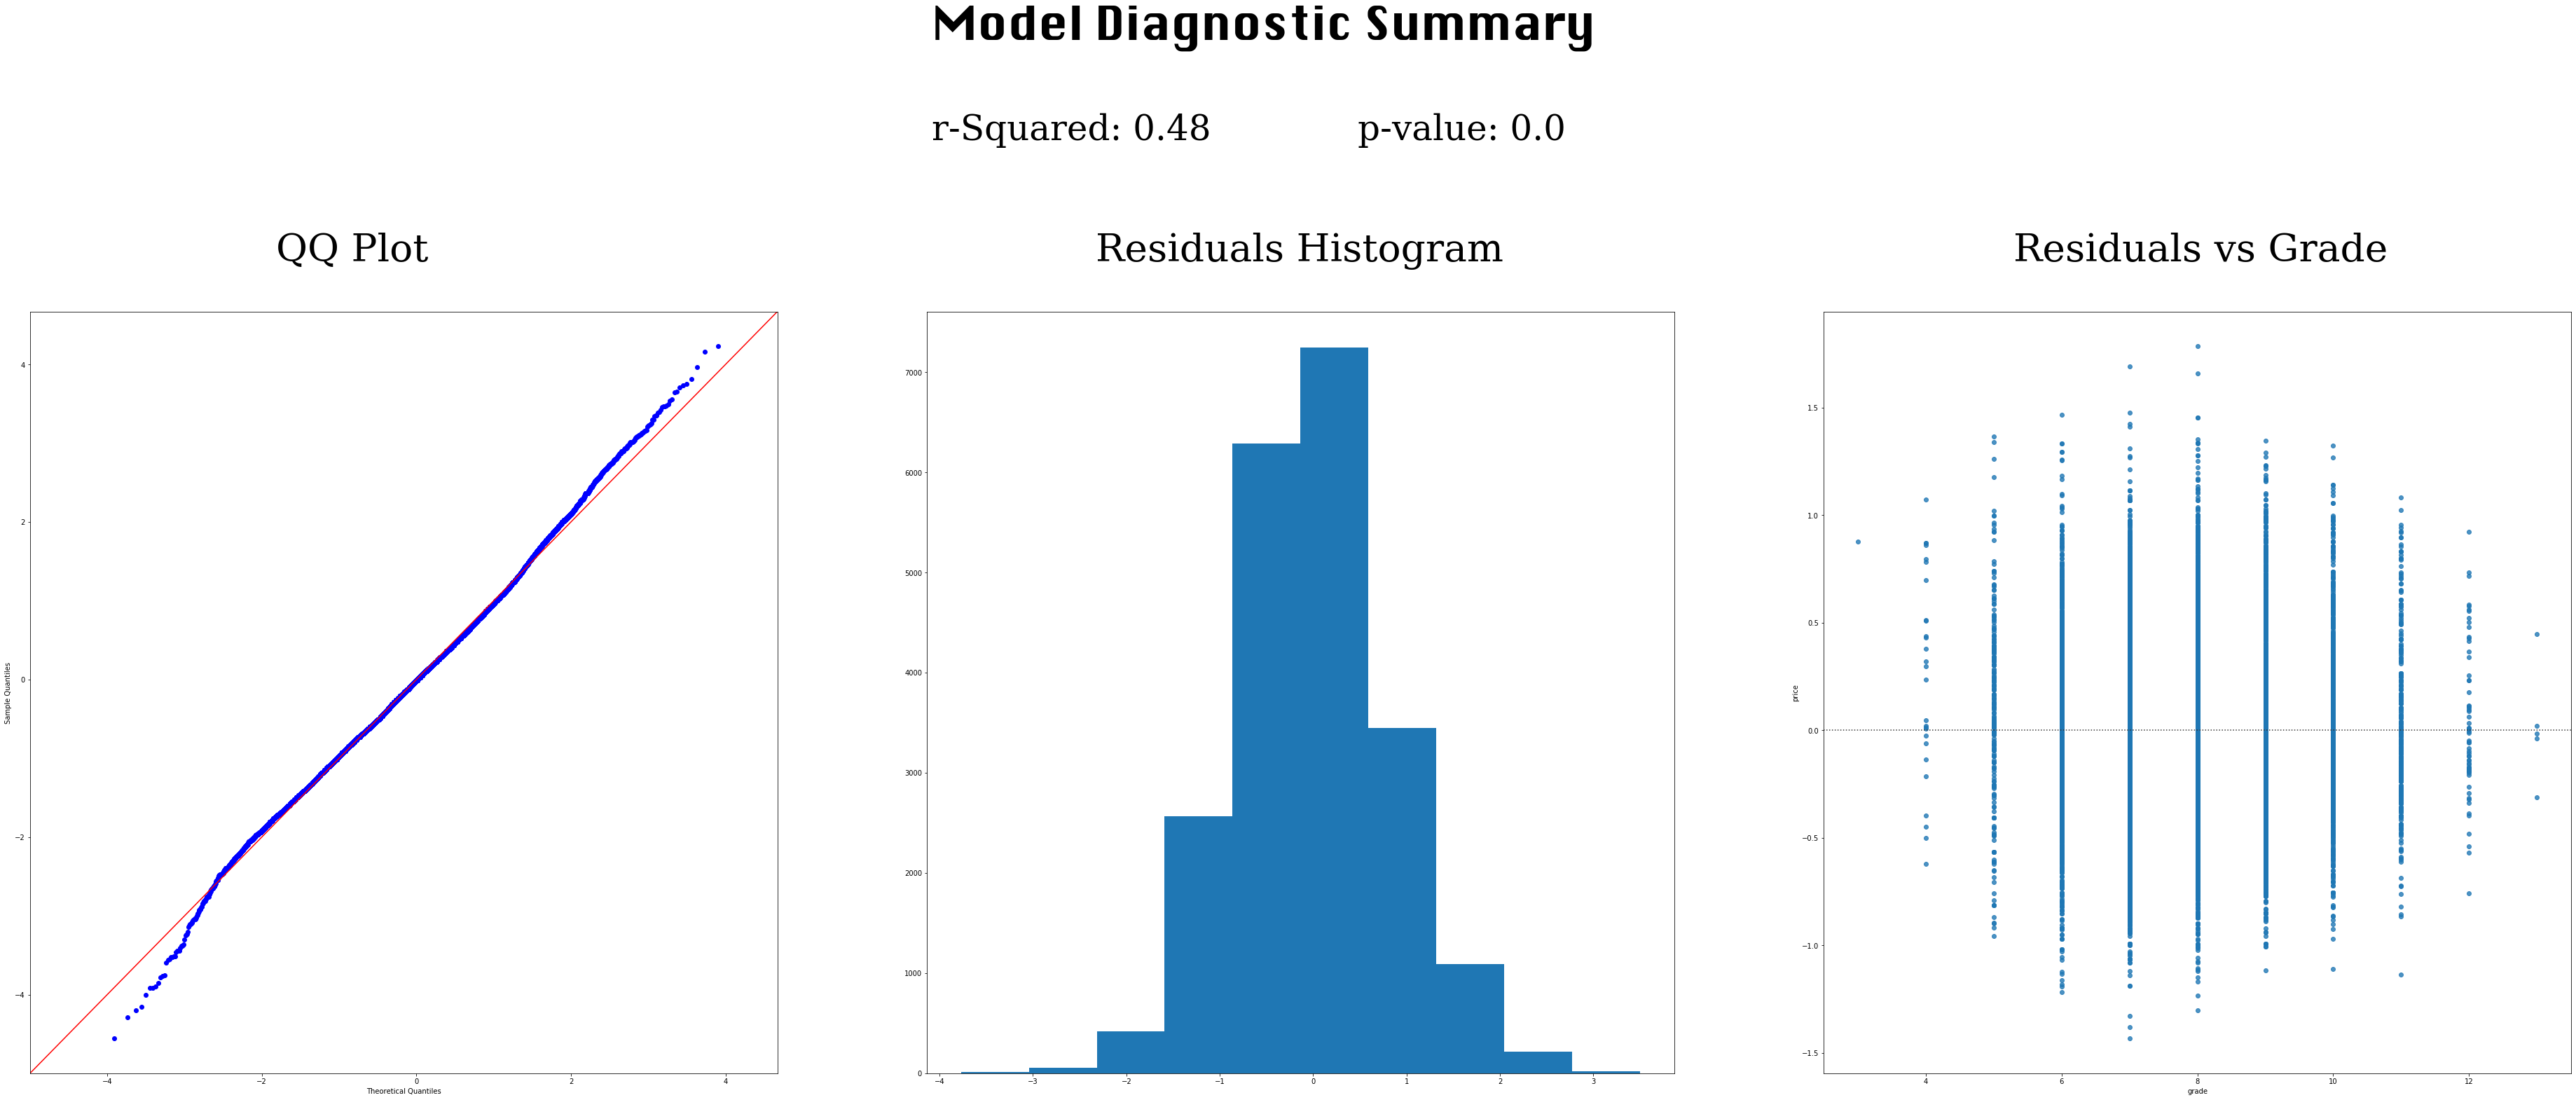

In [34]:
f = 'grade~price'
grade_model = smf.ols(formula=f, data=df).fit()
model_diagnostic(grade_model, df['grade'], 'Grade', price)

<b>Homoscedasticity:</b> Mostly homoscedastic

<b>Normality of residuals:</b> Normal

## Multiple Regression

### Model 1

For the first multiple regression model, we'll include the four variables that had the highest correlations with price without violating the multicollinearity assumption:

In [35]:
Model_1 = smf.ols(formula="price ~ grade + bathrooms + sqft_living15  + sqft_living", data=df).fit()
Model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     6132.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:43:05   Log-Likelihood:                -7944.9
No. Observations:               21363   AIC:                         1.590e+04
Df Residuals:                   21358   BIC:                         1.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5568      0.074    102.124      0.000       7.412       7.702
grade             0.1884      0.003     56.606      0.000       0.182       0.195
bathrooms        -0.0228      0.005     -4.388      0.000      -0.033      -0.013
sqft_living15     0.1787      0.012     15.329      0.000       0.156       0.202
sqft_living       0.3638      0.011     32.327      0.000       0.342       0.386
==============================================================================
Omnibus:                       81.224   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.662
Skew:                           0.119   Prob(JB):                     2.25e-17
Kurtosis:                       2.829   Cond. No.                         414.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>R-squared:</b> The r-squared value, 0.535, indicates that the model can account for about 53% of the variability of price around its mean. 

<b>p-value:</b> All of the p-values round to 0, which means we can reject the null hypothesis. 

### Model 2

Our chosen cutoff for multicollinearity. .80, is quite generous. To limit multicollinearity even further in the second model, let's look at which features have a correlation of .75 or higher.

In [41]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame(
    {'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}
    ).sort_values(by='Correlations', ascending=False)
MC_df

,Correlations,Features
1,0.866887,"[sqft_living, sqft_above]"
4,0.866887,"[sqft_above, sqft_living]"
6,0.812117,"[3, 4]"
7,0.812117,"[4, 3]"
2,0.762595,"[sqft_living, sqft_living15]"
5,0.762595,"[sqft_living15, sqft_living]"
0,0.755235,"[sqft_living, grade]"
3,0.755235,"[grade, sqft_living]"


The sqft_living variable appears as a multicollinear feature in most of the rows. This feature will be excluded from the second model. 

In [42]:
Model_2 = smf.ols(formula="price ~ grade + bathrooms + sqft_living15", data=df).fit()
Model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     7463.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:12:16   Log-Likelihood:                -8455.1
No. Observations:               21363   AIC:                         1.692e+04
Df Residuals:                   21359   BIC:                         1.695e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6187      0.068    126.920      0.000       8.486       8.752
grade             0.2181      0.003     66.580      0.000       0.212       0.225
bathrooms         0.0603      0.005     13.061      0.000       0.051       0.069
sqft_living15     0.3487      0.011     32.717      0.000       0.328       0.370
==============================================================================
Omnibus:                       76.460   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.850
Skew:                           0.135   Prob(JB):                     3.38e-17
Kurtosis:                       2.890   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>R-squared:</b> The model now accounts for only 51% of variability in price.

<b>p-value:</b> All of the p-values round to 0.

### Model 3

In our 3rd model, we'll instead remove sqft_living15, which is highly correlated with sqft_living, to see if there is a higher r-squared value.

In [45]:
Model_3 = smf.ols(formula="price ~ grade + sqft_living + bathrooms", data=df).fit()
Model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     8010.
Date:                Sun, 13 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:17:23   Log-Likelihood:                -8061.7
No. Observations:               21363   AIC:                         1.613e+04
Df Residuals:                   21359   BIC:                         1.616e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2071      0.061    134.633      0.000       8.088       8.327
grade           0.2038      0.003     63.921      0.000       0.198       0.210
sqft_living     0.4416      0.010     43.725      0.000       0.422       0.461
bathrooms      -0.0266      0.005     -5.106      0.000      -0.037      -0.016
==============================================================================
Omnibus:                       86.164   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.616
Skew:                           0.151   Prob(JB):                     1.55e-19
Kurtosis:                       2.919   Cond. No.                         282.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>R-squared:</b> The r-squared value is 0.529, which is closer to the value of the first model. 

<b>p-value:</b> All of the p-values round to 0. 

### Assumption Checks

There is still some multicollinearity with sqft_living and grade in this model, but by removing sqft_living15, we have reduced multicollinearity. We have already checked the homoscedasticity assumption for each predictor variable when diagnosing the simple linear regression models above. All that remains, then, is to check the normality of the model's residuals. We'll create a QQ-plot and confirm that the residuals fall along a straight line. 

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


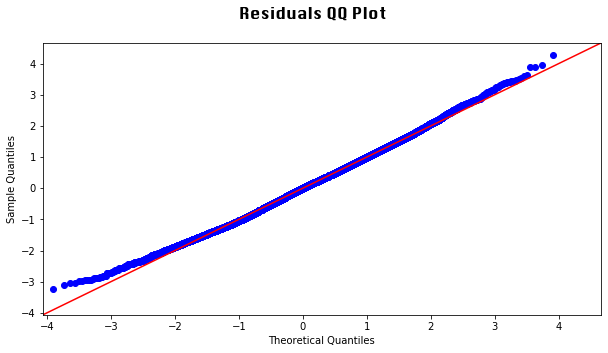

In [52]:
residuals = Model_3.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16, fontname='silom')
fig.set_size_inches(10, 5)
fig.show()

Since almost all of the datapoints fall along a straight line in this QQ-plot, we can consider the normality assumption satisfied.

## Question 3: What combination of features is the best fit, in terms of predictive power, for a multiple regression model to predict house prices?

Grade, sqft_living and bathrooms are the best fit for a multiple regression model. These features are highly correlated with price, have relatively low multicollinearity, and can together account for more than half of the variability of price. All multiple regression assumptions are satisfied with these features included. 

## Validating the Model

The final step in evaluating the quality of the model is cross-validation, which gives us an idea of how the model would perform with new data for the same variables. We'll use sklearn's train_test_split function to split the data into two subsets: one that the model will be trained on, and another that it will be tested on. By default, the function takes 75% of the data as the training subset and the other 25% as its test subset.

Below, we create train and test data for the x and y variables, use the x subsets to predict new y values, and then calculate the distance between these and the actual y-values. Finally, we use the mean_squared_error function to calculate the MSE for both subsets.

In [60]:
#create test and training data subsets
X_train, X_test, y_train, y_test = train_test_split(df, df.price)
train, test = train_test_split(df,test_size=.25,shuffle=True)

In [61]:
df_train = pd.DataFrame(X_train, y_train)
df_test = pd.DataFrame(X_test, y_test)

In [62]:
#look at the shape of the subsets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(16022, 16) (16022,) (5341, 16) (5341,)


In [63]:
#fit the data 
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
#use the model to predict y values for the test and train data
y_pred_train = Model_3.predict(X_train)
y_pred_test = Model_3.predict(X_test)

In [69]:
train_mse = np.mean(y_train-y_pred_train)**2
test_mse = np.mean(y_test-y_pred_test)**2

train_r2 = r2_score(train['price'], Model_3.predict(train))
test_r2 = r2_score(test['price'], Model_3.predict(test))

print('Mean Squared Error Train:', train_mse)
print('Mean Squared Error Test:', test_mse)
print(f'R-Squared Train = {round(train_r2,2)}')
print(f'R-Squared Test = {round(test_r2,2)}')

Mean Squared Error Train: 1.4388136683765465e-05
Mean Squared Error Test: 0.0001294770672393063
R-Squared Train = 0.53
R-Squared Test = 0.54


The MSE and r-squared values for the train and test subsets are similar. This suggests that the model will perform similarly on different data. 

## Conclusions

Together, square footage, grade and bathrooms are the best predictors of a house's price in King County. Homeowners who are interested in selling their homes at a higher price should focus on expanding square footage and improving the quality of construction. When expanding square footage, homeowners should consider building additional bathrooms, as this analysis suggests that number of bathrooms is positively related to price.

The model does have some limitations: given that some of the variables needed to be log-transformed to satisfy regression assumptions, any new data used with the model would have to undergo similar preprocessing. Additionally, given regional differences in housing prices, the model's applicability to data from other counties may be limited. Given that outliers were removed, the model may also not accurately predict extreme values.

Future analysis should explore the best predictors of the prices of homes outside of King County, as well as homes with extreme price values.

## References

[King County House Data Set](https://www.kaggle.com/harlfoxem/housesalesprediction)

[King County Residential Glossary of Terms](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

[Scatter subplots with shared colorbar](https://stackoverflow.com/questions/44970881/matplotlib-multiple-scatter-subplots-with-shared-colour-bar)

[Residual Plots in Python](https://www.statology.org/residual-plot-python/)

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)